<a href="https://colab.research.google.com/github/saurabhraut02/ML_Repo/blob/Lab-01/LAB_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab-01 Linear Regression With One Variable**


In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

**Let's start by importing some libraries and examining the data.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()


Saving ex1data1.csv to ex1data1.csv


{'ex1data1.csv': b'6.1101,17.592\r\n5.5277,9.1302\r\n8.5186,13.662\r\n7.0032,11.854\r\n5.8598,6.8233\r\n8.3829,11.886\r\n7.4764,4.3483\r\n8.5781,12\r\n6.4862,6.5987\r\n5.0546,3.8166\r\n5.7107,3.2522\r\n14.164,15.505\r\n5.734,3.1551\r\n8.4084,7.2258\r\n5.6407,0.71618\r\n5.3794,3.5129\r\n6.3654,5.3048\r\n5.1301,0.56077\r\n6.4296,3.6518\r\n7.0708,5.3893\r\n6.1891,3.1386\r\n20.27,21.767\r\n5.4901,4.263\r\n6.3261,5.1875\r\n5.5649,3.0825\r\n18.945,22.638\r\n12.828,13.501\r\n10.957,7.0467\r\n13.176,14.692\r\n22.203,24.147\r\n5.2524,-1.22\r\n6.5894,5.9966\r\n9.2482,12.134\r\n5.8918,1.8495\r\n8.2111,6.5426\r\n7.9334,4.5623\r\n8.0959,4.1164\r\n5.6063,3.3928\r\n12.836,10.117\r\n6.3534,5.4974\r\n5.4069,0.55657\r\n6.8825,3.9115\r\n11.708,5.3854\r\n5.7737,2.4406\r\n7.8247,6.7318\r\n7.0931,1.0463\r\n5.0702,5.1337\r\n5.8014,1.844\r\n11.7,8.0043\r\n5.5416,1.0179\r\n7.5402,6.7504\r\n5.3077,1.8396\r\n7.4239,4.2885\r\n7.6031,4.9981\r\n6.3328,1.4233\r\n6.3589,-1.4211\r\n6.2742,2.4756\r\n5.6397,4.6042\r\n9.

In [ ]:
data = pd.read_csv('ex1data1.csv', header=None)
data.columns = ['Population', 'Profit']

In [ ]:
# Display dataset information
print(data.info())
print("any duplicate rows:",data.duplicated().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None
any duplicate rows: 0
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


In [ ]:
x_train = data['Population']
y_train = data['Profit']

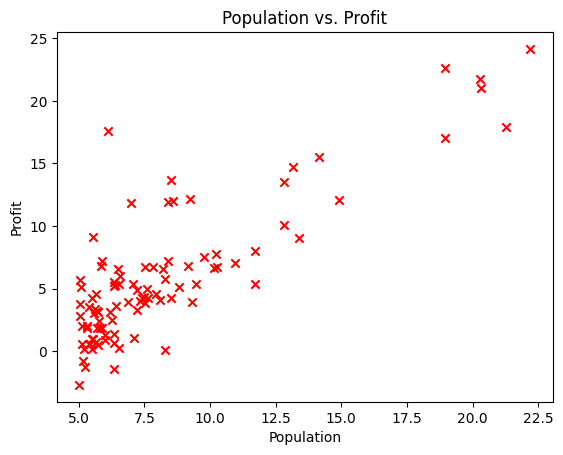

In [ ]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs. Profit')
plt.show()

In [ ]:
#temporary column with 1
data['temp_column'] = 1

In [ ]:
x = data[['temp_column', 'Population']].values  # Shape: (m, 2)
y = data['Profit'].values.reshape(-1, 1)  # Shape: (m, 1)
theta =np.zeros((2, 1)) #theta0, theta1


In [ ]:
def computeCost(x, y, theta):
    m = len(y)
    cost=0
    for i in range (m):
      y_hat = np.dot(x[i], theta)
      cost =cost+  (y_hat- y[i]) ** 2

    total_cost = (1 / (2 * m)) * cost
    return total_cost
print(computeCost(x, y, theta))

[4.47697138]


In [ ]:
def compute_gradient(x, y, theta):
    m = len(y)
    y_hat = np.dot(x, theta)
    error = y_hat - y
    dj_dw = (1 / m) * np.dot(x.T, error)  # Gradient for weights
    return dj_dw

In [ ]:
def gradientDescent(x, y, theta, alpha, iters, cost_funct, gradient_funct):
    j = []  # List to store the cost at each iteration
    for i in range(iters):
        dj_dw = gradient_funct(x, y, theta)
        theta = theta - alpha * dj_dw  # Update theta
        cost = cost_funct(x, y, theta)  # Compute cost
        j.append(cost)  # Track cost
        print(f'Iteration {i+1}: Cost: {cost:.4f}, Theta: {theta.flatten()}')
    return theta, j


In [ ]:
alpha = 0.001
iters = 1000

# Run gradient descent
theta, cost_history = gradientDescent(x, y, theta, alpha, iters, computeCost, compute_gradient)

# Print the optimized parameters
print("Theta found by gradient descent:", theta.flatten())

Iteration 1: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 2: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 3: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 4: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 5: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 6: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 7: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 8: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 9: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 10: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 11: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 12: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 13: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 14: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 15: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 16: Cost: 4.4770, Theta: [-3.89578027  1.19303358]
Iteration 17: Cost: 4.4770, Theta

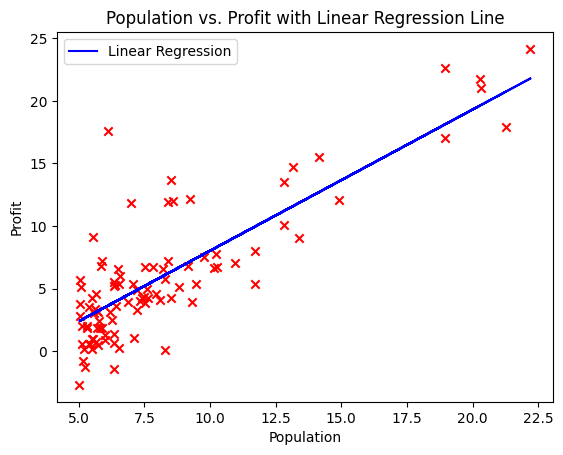

In [ ]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.plot(x_train, np.dot(x, theta), label='Linear Regression', color='blue')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs. Profit with Linear Regression Line')
plt.legend()
plt.show()

In [ ]:
final_cost = computeCost(x, y, theta)
print("Final cost:", final_cost)

Final cost: 4.515955503078913


In [ ]:
#  predict the profit for a population of 7 (in 10,000s)
population_to_predict = 7

# Prepare the input vector (including the bias term)
input_vector = np.array([1, population_to_predict])  # Shape: (1, 2)

# Calculate the predicted profit
predicted_profit = np.dot(input_vector, theta)

print(f"Predicted profit for a population of {population_to_predict} (in 10,000s): ${predicted_profit[0] * 10000:.2f}")



Predicted profit for a population of 7 (in 10,000s): $46496.57


In [ ]:
def computeCost1(x, y, theta):
    m =50
    total_cost=0
    cost=0
    for i in range (m):
      y_hat = np.dot(x, theta)
      cost =(np.square(y_hat - y[i]))

      total_cost=cost+(1/2*m)*cost
      print(f'iteration:{i}, cost function{cost}')
    return total_cost
cost=computeCost1(x, y, theta)
print(cost)

iteration:0, cost function[200.41653877]
iteration:1, cost function[40.75047117]
iteration:2, cost function[54.45487551]
iteration:3, cost function[54.2133042]
iteration:4, cost function[13.57242563]
iteration:5, cost function[33.22126226]
iteration:6, cost function[0.49305997]
iteration:7, cost function[31.88871681]
iteration:8, cost function[7.39243157]
iteration:9, cost function[2.65475558]
iteration:10, cost function[0.08366784]
iteration:11, cost function[6.49210488]
iteration:12, cost function[0.02709547]
iteration:13, cost function[1.15227551]
iteration:14, cost function[4.68292661]
iteration:15, cost function[0.88668662]
iteration:16, cost function[2.45806269]
iteration:17, cost function[2.94379602]
iteration:18, cost function[0.02594703]
iteration:19, cost function[0.66969166]
iteration:20, cost function[0.15205678]
iteration:21, cost function[2.53132256]
iteration:22, cost function[2.43629321]
iteration:23, cost function[2.24096187]
iteration:24, cost function[0.08522259]
ite

In [ ]:
def gradientDescent1(x, y, theta, alpha, iters):
    m = len(y)
    for i in range(iters):
        y_hat = np.dot(x, theta)  # Predicted values
        gradient = (1 / m) * np.dot(x.T, (y_hat - y))  # Compute the gradient
        theta = theta-alpha * gradient  # Update theta
        print(f'iteration:{i}, alpha:{alpha}, theta:{theta}')
    return theta
val=gradientDescent1(x, y, theta,alpha,iters)
print(val)

iteration:0, alpha:0.01, theta:[[-3.78884312]
 [ 1.18229059]]
iteration:1, alpha:0.01, theta:[[-3.78903589]
 [ 1.18230995]]
iteration:2, alpha:0.01, theta:[[-3.78922831]
 [ 1.18232928]]
iteration:3, alpha:0.01, theta:[[-3.78942038]
 [ 1.18234858]]
iteration:4, alpha:0.01, theta:[[-3.7896121 ]
 [ 1.18236784]]
iteration:5, alpha:0.01, theta:[[-3.78980348]
 [ 1.18238707]]
iteration:6, alpha:0.01, theta:[[-3.78999452]
 [ 1.18240626]]
iteration:7, alpha:0.01, theta:[[-3.79018521]
 [ 1.18242541]]
iteration:8, alpha:0.01, theta:[[-3.79037555]
 [ 1.18244454]]
iteration:9, alpha:0.01, theta:[[-3.79056556]
 [ 1.18246362]]
iteration:10, alpha:0.01, theta:[[-3.79075522]
 [ 1.18248268]]
iteration:11, alpha:0.01, theta:[[-3.79094454]
 [ 1.1825017 ]]
iteration:12, alpha:0.01, theta:[[-3.79113351]
 [ 1.18252068]]
iteration:13, alpha:0.01, theta:[[-3.79132215]
 [ 1.18253963]]
iteration:14, alpha:0.01, theta:[[-3.79151045]
 [ 1.18255855]]
iteration:15, alpha:0.01, theta:[[-3.7916984 ]
 [ 1.18257743]]
it